<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/11%3AConvolutional%20Neural%20Networks%20(CNN)/11_3_CIFAR10_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# Transformation
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 Dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:05<00:00, 33.7MB/s]


In [ ]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [ ]:
batch_size = 100

# Data Loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


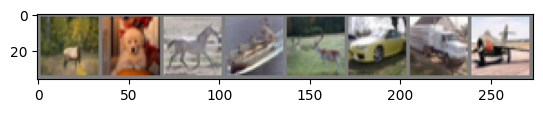

In [ ]:
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# show images
# images, labels = next(iter(train_loader))
imshow(torchvision.utils.make_grid(images[:8]))

In [ ]:
labels[:8]

tensor([4, 5, 7, 8, 4, 1, 9, 0])

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
[classes[i] for i in labels[:8]]

['deer', 'dog', 'horse', 'ship', 'deer', 'car', 'truck', 'plane']

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), padding="same"), # output (32, 32, 32)
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), # output (32, 16, 16)

      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3)), # output (64, 14, 14)
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)), # output (64, 7, 7)
    )
    self.fc_layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=64*7*7, out_features=600),
      nn.ReLU(),
      nn.Linear(in_features=600, out_features=128),
      nn.ReLU(),
      nn.Linear(in_features=128, out_features=10)
    )

  def forward(self, x):
    x = self.network(x)
    x = self.fc_layers(x)
    return x

In [ ]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

model = ConvNet().to(device)
criterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Traininig Loop
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterian(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')


# Testing the model
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f'Accuracy of the model on the 10000 test images: {100 * correct / total} %')

Epoch [1/10], Step [100/500], Loss: 0.0520
Epoch [1/10], Step [200/500], Loss: 0.0165
Epoch [1/10], Step [300/500], Loss: 0.0685
Epoch [1/10], Step [400/500], Loss: 0.0173
Epoch [1/10], Step [500/500], Loss: 0.0961
Epoch [2/10], Step [100/500], Loss: 0.0424
Epoch [2/10], Step [200/500], Loss: 0.0461
Epoch [2/10], Step [300/500], Loss: 0.0454
Epoch [2/10], Step [400/500], Loss: 0.0541
Epoch [2/10], Step [500/500], Loss: 0.0811
Epoch [3/10], Step [100/500], Loss: 0.0170
Epoch [3/10], Step [200/500], Loss: 0.0198
Epoch [3/10], Step [300/500], Loss: 0.0277
Epoch [3/10], Step [400/500], Loss: 0.0257
Epoch [3/10], Step [500/500], Loss: 0.0529
Epoch [4/10], Step [100/500], Loss: 0.0260
Epoch [4/10], Step [200/500], Loss: 0.0920
Epoch [4/10], Step [300/500], Loss: 0.0496
Epoch [4/10], Step [400/500], Loss: 0.0808
Epoch [4/10], Step [500/500], Loss: 0.0383
Epoch [5/10], Step [100/500], Loss: 0.0965
Epoch [5/10], Step [200/500], Loss: 0.0323
Epoch [5/10], Step [300/500], Loss: 0.0229
Epoch [5/10